# 1-Basics

Original : [SNU_AOclass/Opening FITS](https://nbviewer.org/github/ysbach/SNU_AOclass/blob/master/Notebooks/02-Opening_FITS.ipynb)

    2022. 04. 25. 박형욱 (spica095@snu.ac.kr)

# 1. Python

파이썬에 대해 알고 있으면 좋을 것들을 간단하게 정리한다.

## 1. 1. PEP8

파이썬에는 '정석' 스타일이 있다. 코드가 공통된 스타일을 가지고 있으면 다른 사람의 코드를 쉽게 이해할 수 있다. 자기가 쓴 코드도 오랜 시간이 지나면 못알아보기 십상이기 때문에 일관된 스타일로 친절하게 코드를 작성하는 것은 많은 도움이 되고 나중에 수정하기도 쉽다. 이 '정석' 중 아주 기초적인 내용을 정리한 것이 바로 PEP8이다.

[PEP 8 – Style Guide for Python Code](https://peps.python.org/pep-0008/)

> One of Guido’s key insights is that code is read much more often than it is written. The guidelines provided here are intended to improve the readability of code and make it consistent across the wide spectrum of Python code. As PEP 20 says, “Readability counts”.

### 몇 가지 예시

### 1. Naming convention

* pascal case, camel case : `PascalCase`, `camelCase`, `AstroObs`, `HTTPServerError`, `SkyCoord`, ...
* snake case : `snake_case`, `SNAKE_CASE`, `my_variable`, `flux_list`, `SPEED_OF_LIGHT`, ...


* 함수, 변수, 속성 에는 `lowercase`, `lower_case_with_underscores`를 사용
* 상수에는 `UPPERCASE`, `UPPER_CASE_WITH_UNDERSCORES`를 사용
* 클래스, 예외에는 `Capitalized`, `CapitalizedWords`를 사용
* 모듈 이름은 소문자로 이루어진 짧은 단어 사용, `_`도 가독성을 늘리기 위해 사용 가능


* 그 외 `Capital_Words_With_Ugly_Uderbars`등은 사용을 자제할 것
* `O`, `l`, `I`은 혼란의 여지가 있으므로 단독으로 사용하지 말 것

### 2. White spaces

* 한 줄의 길이는 79자 이내 : 수평 스크롤은 매우 불편하다
* 클래스와 함수는 빈 줄 2개로 구분, 클래스의 메서드는 한줄로 구분
* 괄호 안 공백; 콤마, 세미콜론, 콜론 사이 공백; 연산자 사이 공백; ...

In [ ]:
# 괄호 안 공백
# Correct:
spam(ham[1], {eggs: 2})
# Wrong:
spam( ham[ 1 ], { eggs: 2 } )

# 콤마, 세미콜론, 콜론 사이 공백
# Correct:
if x == 4: print(x, y); x, y = y, x
# Wrong:
if x == 4 : print(x , y) ; x , y = y , x

# 연산자 사이 공백
# Correct:
i = i + 1
submitted += 1
x = x*2 - 1
hypot2 = x*x + y*y
c = (a+b) * (a-b)
# Wrong:
i=i+1
submitted +=1
x = x * 2 - 1
hypot2 = x * x + y * y
c = (a + b) * (a - b)

# keyword arguments
# Correct:
def complex(real, imag=0.0):
    return magic(r=real, i=imag)
# Wrong:
def complex(real, imag = 0.0):
    return magic(r = real, i = imag)

### 3. Imports

* `import ...`는 항상 파일의 첫 부분에 배치
* 다음과 같은 순서로 배치 (한 줄 공백으로 구분)
    - Standard library imports.
    - Related third party imports.
    - Local application/library specific imports.
    
    

    

## 1. 2. `pathlib`

`pathlib`는 python 3.4 부터 추가된 모듈로써, 경로를 객체화하여 여러가지 기능을 제공한다. [(pathlib Documentation)](https://docs.python.org/ko/3/library/pathlib.html)

이전에는 문자열의 형태로 경로를 다루었고, 운영체제에 대한 의존성을 없애기 위해서 `os` 모듈을 사용해왔다.

In [1]:
import os

HOME = os.path.expanduser('~')
print('Home directory :', HOME)

download_dir = os.path.join(HOME, 'Downloads')  # os.path.join을 이용한 연결
not_existing_dir = HOME + '/not_existing_dir'   # 문자열 연산자 +를 이용한 연결
print('Downloads directory exists :', os.path.exists(download_dir))
print('not_existing_dir directory exists :', os.path.exists(not_existing_dir))

Home directory : /Users/hbahk
Downloads directory exists : True
not_existing_dir directory exists : False



`pathlib`는 경로를 단순한 문자열 대신 객체로 다루면서 그 사이의 연산자를 정의할 수 있게 되었고 간단한 함수를 직관적으로 제공한다.


In [2]:
from pathlib import Path

HOME = Path.home()
print('Home directory :', HOME)

# 연산자 '/'가 Path 인스턴스와 문자열을 연결해준다
download_dir = HOME / 'Downloads'
not_existing_dir = HOME / 'not_existing_dir'

print('Downloads directory exists :', download_dir.exists())
print('not_existing_dir directory exists :', not_existing_dir.exists())

dir_name = 'dir'
sub_dir_name = 'sub_dir_name'
file_name = 'file_name'

# os.path
file = os.path.join(dir_name, sub_dir_name, file_name)

# pathlib
dir = Path(dir_name)
file = dir / sub_dir_name / file_name

Home directory : /Users/hbahk
Downloads directory exists : True
not_existing_dir directory exists : False


In [3]:
# 그 외 기능들

path = Path('/user/path/to/file.txt')

print('경로 : ', path)
print('이전 경로 : ', path.parent)
print('모든 이전 경로 : ', list(path.parents))
print('경로 구성성분 : ', path.parts)
print('파일 이름 : ', path.name)
print('확장자 제외한 파일 이름 : ', path.stem)
print('파일 확장자 : ', path.suffix)

fits_files = list(download_dir.glob('*.fits'))
print('Downloads 디렉토리에 있는 모든 fits파일 : ', fits_files)

경로 :  /user/path/to/file.txt
이전 경로 :  /user/path/to
모든 이전 경로 :  [PosixPath('/user/path/to'), PosixPath('/user/path'), PosixPath('/user'), PosixPath('/')]
경로 구성성분 :  ('/', 'user', 'path', 'to', 'file.txt')
파일 이름 :  file.txt
확장자 제외한 파일 이름 :  file
파일 확장자 :  .txt
Downloads 디렉토리에 있는 모든 fits파일 :  [PosixPath('/Users/hbahk/Downloads/new-image.fits'), PosixPath('/Users/hbahk/Downloads/ps1_training_tarrio.fits')]


***

# 2. FITS File Handling

## 2. 1. FITS

* FITS (Flexible Image Transport System) [The FITS Support Office](https://fits.gsfc.nasa.gov)
* 천문학에서 주로 사용되는 데이터 저장 형식으로, 이미지, 테이블 등의 다차원 배열을 저장하는데 쓰인다


## 2. 2. HDU

* Header : ASCII 형식으로 메타데이터를 저장한 것
* HDU : Header Data Unit
* HDU List : HDU의 파이썬 `list`
* MEF : Multi-Extension FITS

FITS파일은 간단히 한 개의 PrimaryHDU로 이루어져있을 수도 있지만 많은 경우 여러개의 HDU를 포함하고 있다(MEF). HDU는 다차원 배열 형태의 데이터가 저장되는 단위이고, 헤더(header)를 포함하고 있다. 헤더에는 관측일, 기기, airmass 등 "데이터에 대한 정보"(meta-data)가 담겨있다. 

## 2. 3. Astropy FITS I/O

DS9, ginga 등의 프로그램을 통해서 FITS 파일의 이미지와 헤더 정보를 확인할 수 있다.
파이썬으로 분석을 하기 위해서는 파이썬 데이터 형식으로 FITS 파일을 불러와야 하는데, `astropy.io.fits` 모듈을 이용하면 쉽게 불러올 수 있다. 

[`astropy.io.fits` Documentation](https://docs.astropy.org/en/stable/io/fits/index.html)

FITS파일을 읽고 쓰는 것은 다음과 같이 할 수 있다.

In [7]:
from astropy.io import fits

CWD = Path.cwd() # current working directory
DATA_DIR = CWD.parent / 'data' / 'example'
fpath_list = list(DATA_DIR.glob('example*.fits'))
fpath = fpath_list[0]

# or you can just get it directly
fpath = Path('../data/example/example1.fits')

# reading fits file
hdul1 = fits.open(fpath)  # this is HDU list, with sigle element of HDU
hdul1.info()
hdul2 = fits.open(fpath_list[1])  # this is ugly, but it's for demonstration
hdul2.info()

# writing new MEF file
# - HDU List should not contain more than one PrimaryHDU
hdu2_imghdu = fits.ImageHDU(data=hdul2[0].data, header=hdul2[0].header)
# - making HDU List
hdul = fits.HDUList([hdul1[0], hdu2_imghdu])
hdul.info()
# - writing into fits file
hdul.writeto(DATA_DIR/'output.fits', overwrite=True)


Filename: ../data/example/example1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      69   (250, 250)   float32   
Filename: /Users/hbahk/class/ao22/ta/tutorial/data/example/example2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      69   (250, 250)   float32   
Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      70   (250, 250)   float32   
  1                1 ImageHDU        71   (250, 250)   float32   


## 2. 4. Header

헤더에는 여러가지 키워드와 그에 해당하는 값으로 데이터에 대한 정보를 저장한다. 가장 많이 사용되는 표준화된 키워드는 [여기](https://heasarc.gsfc.nasa.gov/docs/fcg/standard_dict.html)에 정리되어 있고 그 외에도 다양한 키워드가 사용되고 있다 ([여러가지 키워드 사전](https://fits.gsfc.nasa.gov/fits_dictionary.html)).

몇가지 중요한 키워드의 예시
* ``OBJECT``: The name of the target
* ``DATE-OBS``: The time when the exposure started (in UT). Mostly in the format of ``YYYY-MM-DDTHH:mm:ss`` following [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601), e.g., ``2019-01-02T13:01:01`` means it was taken on 2019 Jan 2nd, at 13:01:01.
* ``EXPTIME``: The exposure time in seconds.
* ``NAXIS1``: The number of pixels along the axis 1 (which is the X axis). Same for ``NAXIS2``.
* ``FILTER``: Not a standard, but widely used to show the filter (e.g., ``V`` or ``Johnson B``, etc).

In [8]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  250                                                  
NAXIS2  =                  250                                                  
EXTEND  =                    T                                                  
DATE-OBS= '2022-03-28T18:13:11' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   300.00000000000000 /Exposure time in seconds                        
EXPOSURE=   300.00000000000000 /Exposure time in seconds                        
SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -19.990623474121094 /CCD temperature at start of exposure in C       
XPIXSZ  =   11.279999999999999 /Pixel Width in microns (after binning)          
YPIXSZ  =   11.2799999999999

#### Example

관측의 중간 지점은 시작시간 + 노출시간 / 2 이므로 astropy 에서 제공하는 함수를 이용하면 다음과 같이 구할 수 있다.
* [``astropy.time`` module](http://docs.astropy.org/en/stable/time/)
* [``astropy.units`` module](http://docs.astropy.org/en/stable/units/)

In [9]:
from astropy.time import Time
from astropy import units as u

obst = Time(hdul[0].header["DATE-OBS"])
expt = hdul[0].header["EXPTIME"] * u.s
print("The middle of the observation time is", obst + expt) #/2

The middle of the observation time is 2022-03-28T18:18:11.000


## 2. 5. Image Visualization

### 2. 5. 1. `matplotlib`

FITS에 저장된 이미지를 보려면 `matplotlib`를 이용한 일반적인 방법을 따르면 된다.

In [10]:
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
from matplotlib import rcParams
# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
rcParams.update({'font.size':12})

Text(0.5, 1.0, 'example2.fits')

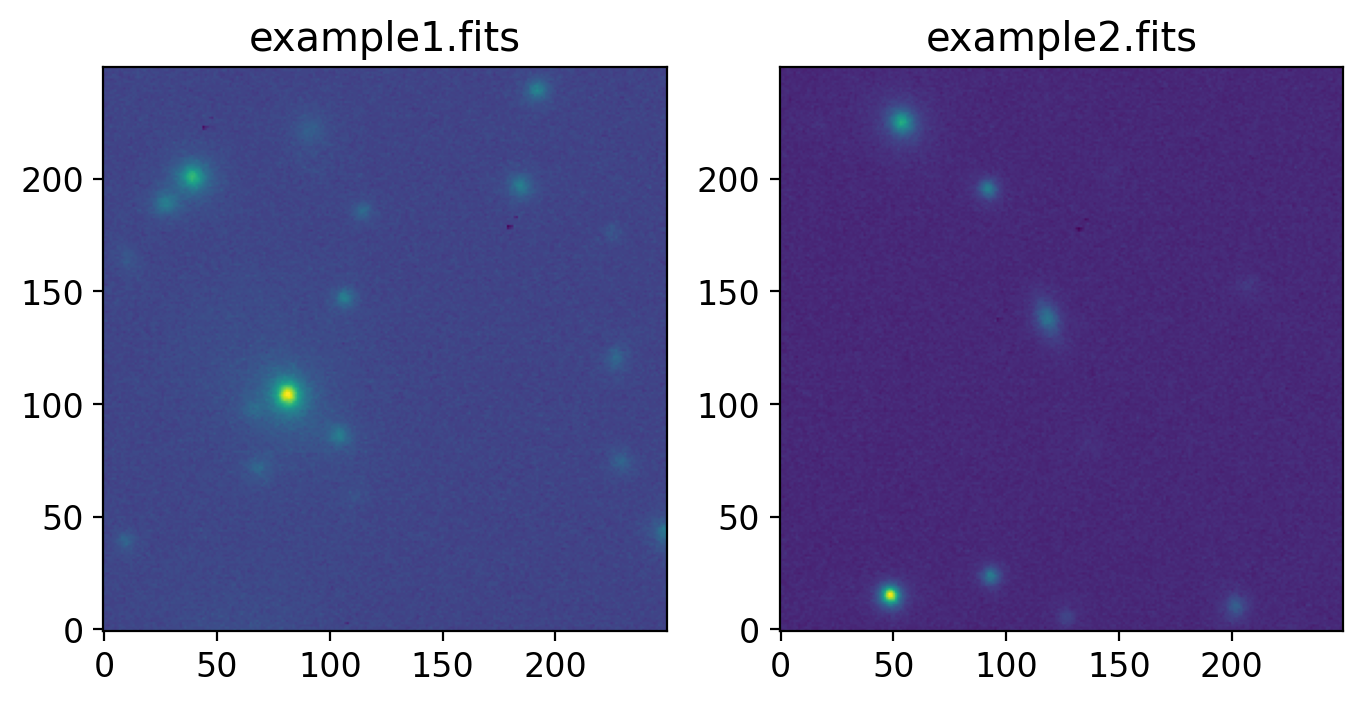

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].imshow(hdul[0].data, origin='lower')
axs[0].set_title('example1.fits')
axs[1].imshow(hdul[1].data, origin='lower')
axs[1].set_title('example2.fits')

### 2. 5. 2. Zscale

그런데 천체 이미지는 보통 아주 밝은 천체(밝은 별 등)를 포함하고 있어서 일반적인 스케일로 이미지를 나타낼 경우 이미지에서 어두운 천체를 확인하기 어렵다. 따라서 적당한 밝기의 상한선과 하한선을 설정하여 밝은 천체뿐만 아니라 어두운 천체까지 확인할 수 있는 IRAF의 zscale 방식이 널리 사용된다. [zscale 알고리즘에 대한 설명](https://iraf.net/forum/viewtopic.php?showtopic=134139)

파이썬으로도 [astropy의 ZScaleInterval](https://docs.astropy.org/en/stable/api/astropy.visualization.ZScaleInterval.html)을 사용하면 zscale로 이미지를 나타낼 수 있다.



Text(0.5, 1.0, 'example2.fits')

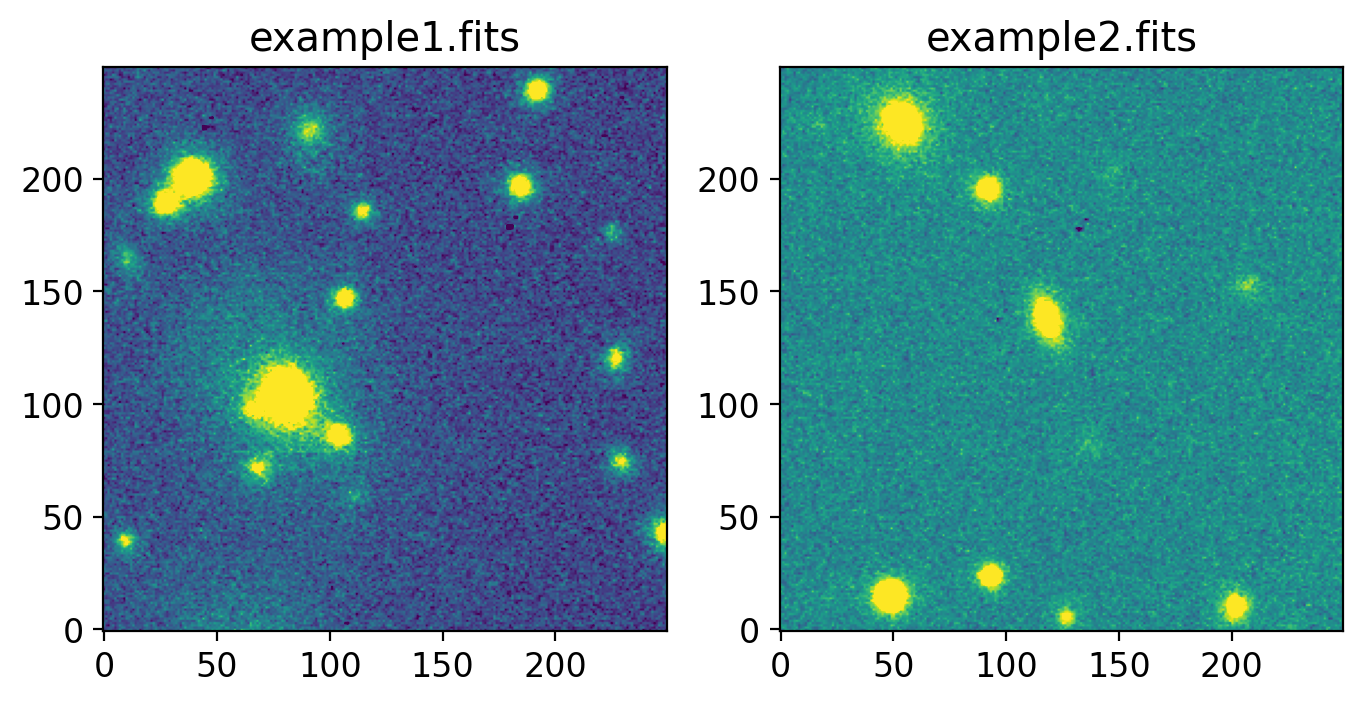

In [12]:
from astropy.visualization import ZScaleInterval

interval = ZScaleInterval()

fig, axs = plt.subplots(1, 2, figsize=(8,4))
vmin, vmax = interval.get_limits(hdul[0].data)
axs[0].imshow(hdul[0].data, origin='lower', vmax=vmax, vmin=vmin)
axs[0].set_title('example1.fits')

vmin, vmax = interval.get_limits(hdul[1].data)
axs[1].imshow(hdul[1].data, origin='lower', vmax=vmax, vmin=vmin)
axs[1].set_title('example2.fits')

`ysvisutilpy`를 이용하면 조금 더 간단히 이미지를 표시할 수 있다.

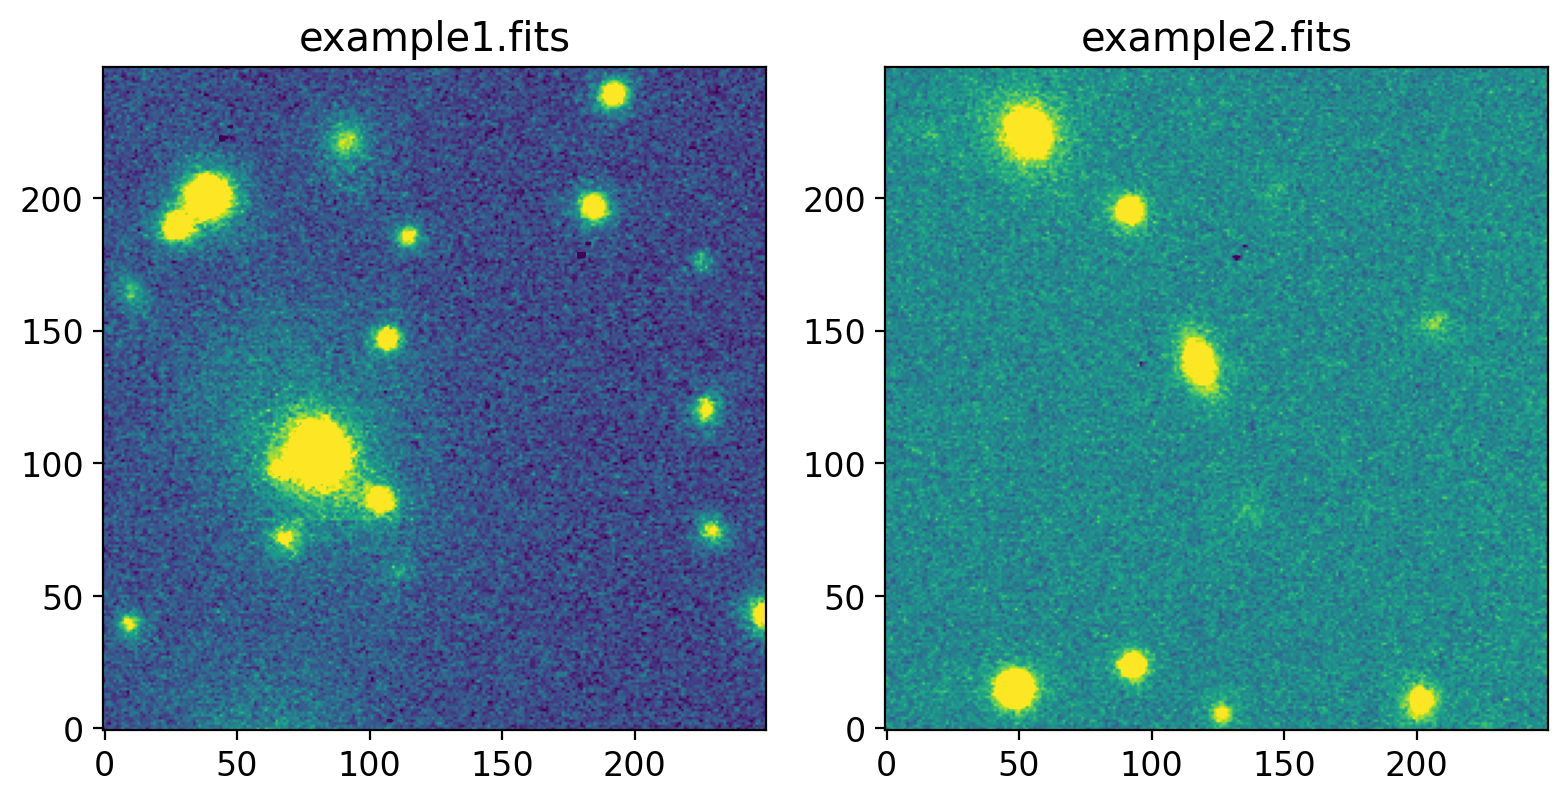

In [13]:
import ysvisutilpy as yvu

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
yvu.zimshow(axs[0], hdul[0].data)
yvu.zimshow(axs[1], hdul[1].data)
axs[0].set_title('example1.fits')
axs[1].set_title('example2.fits')
plt.tight_layout()

### 2. 5. 3. WCS (World Coordinate System)

> World Coordinate Systems (WCSs) describe the geometric transformations between one set of coordinates and another. A common application is to map the pixels in an image onto the celestial sphere. Another common application is to map pixels to wavelength in a spectrum. ([astropy.wcs Documentation](https://docs.astropy.org/en/stable/wcs/index.html))

이미지의 픽셀을 천구상의 좌표(RA/DEC, l/b, ...)로 바꾸어주기 위해서는 WCS 정보가 필요하다 ([이곳](http://www.atnf.csiro.au/people/mcalabre/WCS/Intro/WCS01.html)의 4-7번째 슬라이드 참조). FITS 파일의 헤더에 관련된 정보가 포함되어있어서 헤더로부터 이 변환식을 얻어낼 수 있다 (서울대학교 천문대는 관측 후에 자동으로 WCS 정보가 헤더에 입력되지 않으므로 나중에 직접 추가해주어야 한다).

Astropy의 `wcs.WCS`를 이용하면 관련된 작업을 할 수 있다.

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 258.073907511  64.164886281  
CRPIX : 966.18377686  349.54772949  
PC1_1 PC1_2  : -6.02271799504e-05  8.98888133299e-05  
PC2_1 PC2_2  : 8.99459955797e-05  6.02152557614e-05  
CDELT : 1.0  1.0  
NAXIS : 250  250


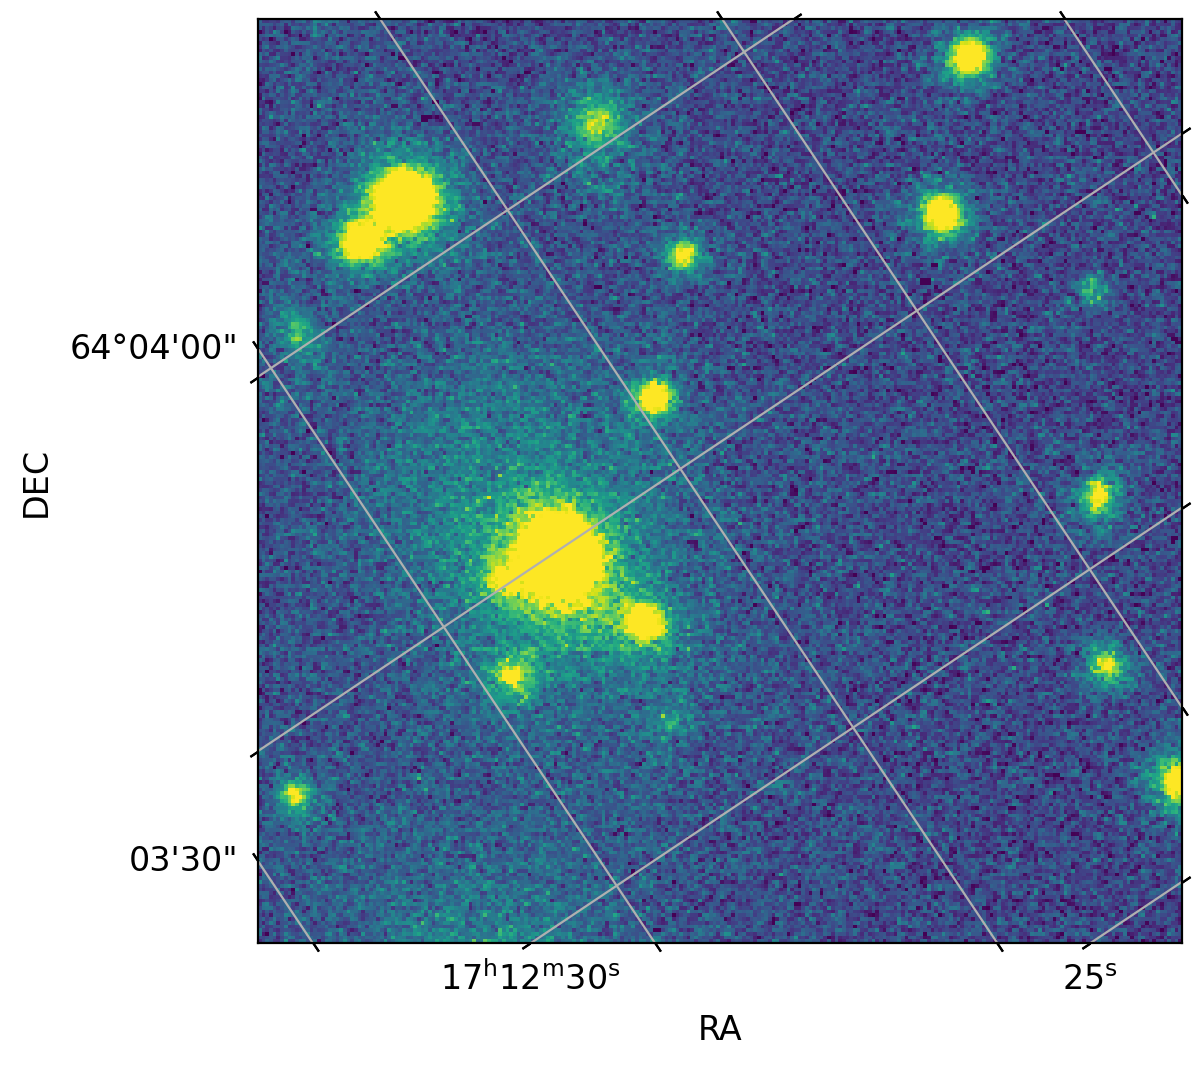

In [14]:
from astropy.wcs import WCS

wcs = WCS(hdul[0].header)  # 헤더에서 WCS 정보를 가져오기
print(wcs)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection=wcs)  #  WCS로 투영
yvu.zimshow(ax, hdul[0].data)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.grid('on')

### 2. 5. 4. SAO ds9 and ginga

These are quick image displayers for FITS files.

Check [Softwares/Image_Displayer](https://github.com/ysBach/SNU_AOclass/blob/master/Notebooks/00-1_Softwares.md#6-image-displayer)



***

# 3. Astropy Table

* [Astropy Table](https://docs.astropy.org/en/stable/table/index.html)
* [Astropy ASCII I/O](https://docs.astropy.org/en/stable/io/ascii/index.html)

* `pandas` : [SNU_AOclass/python_prep/02-pandas](https://github.com/ysBach/SNU_AOclass/blob/master/Notebooks/python_prep/02-pandas.ipynb)

## 3. 1. ASCII Table

* csv : character-separated values (comma-separated values)

```
    ID ,Planck name ,SZ_SNR ,RA ,Dec ,Dist,zspec, Nspec ,zphot ,Rcor ,sigR ,Flag ,Notes
    194 ,PSZ2 G048.47+34.86 ,5.74,--,--,--,--,--,--,--,--,ND ,
    242 ,PSZ2 G058.31+41.96 ,4.54,--,--,--,--,--,--,--,--,ND ,

```

* fixed width


```
               RA            DEC   VELOCITY     CZERR   CZXCR  VELQUAL            BESTTEMP
    -------------  -------------  ---------  --------  ------  -------  ------------------
     03:18:7.6480   41:31:21.230   40645.86      6.00   27.59        _         sptemp.fits
     03:16:57.901   41:28:11.661     -65.95      6.00   24.77        _     m31_k_temp.fits
     03:18:5.5660   41:26:7.7350   44369.29     53.96    3.88        _     m31_f_temp.fits
```

* flatform-specific formats (IPAC, CDS, AAS MRT, SExtractor, ...)

## 3. 2. Basic Manipulations

* reading and writing
* get data from columns of interest
* get column names, units, format, dtype, ...
* sorting
* stacking tables
* transform to pandas table

Example table: `./tutorial/data/example.mrt.txt`

```
Title: One Law to Rule Them All: The Radial Acceleration Relation of Galaxies
Authors: F. Lelli, S.S. McGaugh, J.M. Schombert, M.S. Pawlowski
Table: Data Behind Figure 2
================================================================================
Byte-by-byte Description of file: Figure2.mrt
--------------------------------------------------------------------------------
   Bytes Format Units     Label   Explanations
--------------------------------------------------------------------------------
   1-  6 F6.2   [m/s2]    gbar   log10 of the mean baryonic acceleration
   8- 13 F6.2   [m/s2]    gobs   log10 of the mean observed acceleration
  15- 18 F4.2   [m/s2]    sd     standard deviation around the mean
  20- 22 I3     ---       N      number of datapoints in the bin
--------------------------------------------------------------------------------
-11.69 -10.75 0.18  75 
-11.48 -10.70 0.16 191 
-11.26 -10.57 0.15 308 
-11.05 -10.43 0.14 323
...
```


In [17]:
from astropy.io.ascii import read
from astropy.table import vstack, hstack

# reading
tpath = Path('../data/example/example.mrt.txt')
table = read(tpath, format='mrt')  # Format: AAS Mechine-Readable Tables

table

<Table length=14>
    gbar        gobs         sd       N  
dex(m / s2) dex(m / s2) dex(m / s2)      
  float64     float64     float64   int64
----------- ----------- ----------- -----
     -11.69      -10.75        0.18    75
     -11.48       -10.7        0.16   191
     -11.26      -10.57        0.15   308
     -11.05      -10.43        0.14   323
     -10.84      -10.31        0.13   283
     -10.62      -10.17        0.12   229
     -10.41      -10.03        0.14   242
     -10.19        -9.9        0.13   229
      -9.98       -9.76        0.14   204
      -9.76        -9.6        0.14   177
      -9.55       -9.44        0.14   137
      -9.34       -9.29        0.11   104
      -9.12       -9.11        0.13    85
      -8.91        -8.9        0.11    43

In [18]:
# get data from columns of interest
gbar = table['gbar']
print(type(gbar))
print(gbar.data, type(gbar.data))  # numpy array

table_cols_of_interest = table['gobs', 'N'] 
table_cols_of_interest

<class 'astropy.table.column.Column'>
[-11.69 -11.48 -11.26 -11.05 -10.84 -10.62 -10.41 -10.19  -9.98  -9.76
  -9.55  -9.34  -9.12  -8.91] <class 'numpy.ndarray'>


<Table length=14>
    gobs      N  
dex(m / s2)      
  float64   int64
----------- -----
     -10.75    75
      -10.7   191
     -10.57   308
     -10.43   323
     -10.31   283
     -10.17   229
     -10.03   242
       -9.9   229
      -9.76   204
       -9.6   177
      -9.44   137
      -9.29   104
      -9.11    85
       -8.9    43

In [19]:
# table can be indexed
table[3]

<Row index=3>
    gbar        gobs         sd       N  
dex(m / s2) dex(m / s2) dex(m / s2)      
  float64     float64     float64   int64
----------- ----------- ----------- -----
     -11.05      -10.43        0.14   323

In [20]:
table[4:10]

<Table length=6>
    gbar        gobs         sd       N  
dex(m / s2) dex(m / s2) dex(m / s2)      
  float64     float64     float64   int64
----------- ----------- ----------- -----
     -10.84      -10.31        0.13   283
     -10.62      -10.17        0.12   229
     -10.41      -10.03        0.14   242
     -10.19        -9.9        0.13   229
      -9.98       -9.76        0.14   204
      -9.76        -9.6        0.14   177

In [21]:
# table can be masked
mask = table['N'] < 80
table[mask]

<Table length=2>
    gbar        gobs         sd       N  
dex(m / s2) dex(m / s2) dex(m / s2)      
  float64     float64     float64   int64
----------- ----------- ----------- -----
     -11.69      -10.75        0.18    75
      -8.91        -8.9        0.11    43

In [22]:
# get column names
print(table.colnames)

# get unit for a column
print(table['gobs'].unit)

# get format for a column
print(table['gobs'].format)  # not implemented yet?

# set format for a colums
table['gobs'].format = '6.2f'
print(table['gobs'].format)

['gbar', 'gobs', 'sd', 'N']
dex(m / s2)
None
6.2f


In [23]:
# sorting
table.sort('N', reverse=True)
table

<Table length=14>
    gbar        gobs         sd       N  
dex(m / s2) dex(m / s2) dex(m / s2)      
  float64     float64     float64   int64
----------- ----------- ----------- -----
     -11.05      -10.43        0.14   323
     -11.26      -10.57        0.15   308
     -10.84      -10.31        0.13   283
     -10.41      -10.03        0.14   242
     -10.19       -9.90        0.13   229
     -10.62      -10.17        0.12   229
      -9.98       -9.76        0.14   204
     -11.48      -10.70        0.16   191
      -9.76       -9.60        0.14   177
      -9.55       -9.44        0.14   137
      -9.34       -9.29        0.11   104
      -9.12       -9.11        0.13    85
     -11.69      -10.75        0.18    75
      -8.91       -8.90        0.11    43

In [24]:
# vertical stack
table_vstacked = vstack([table[:3], table[-3:]])
table_vstacked

<Table length=6>
    gbar        gobs         sd       N  
dex(m / s2) dex(m / s2) dex(m / s2)      
  float64     float64     float64   int64
----------- ----------- ----------- -----
     -11.05      -10.43        0.14   323
     -11.26      -10.57        0.15   308
     -10.84      -10.31        0.13   283
      -9.12       -9.11        0.13    85
     -11.69      -10.75        0.18    75
      -8.91       -8.90        0.11    43

In [25]:
# horizontal stack
table_hstacked = hstack([table[:3], table[-3:]], table_names=['first3', 'last3'])
table_hstacked

<Table length=3>
gbar_first3 gobs_first3  sd_first3  ...  gobs_last3   sd_last3  N_last3
dex(m / s2) dex(m / s2) dex(m / s2) ... dex(m / s2) dex(m / s2)        
  float64     float64     float64   ...   float64     float64    int64 
----------- ----------- ----------- ... ----------- ----------- -------
     -11.05      -10.43        0.14 ...       -9.11        0.13      85
     -11.26      -10.57        0.15 ...      -10.75        0.18      75
     -10.84      -10.31        0.13 ...       -8.90        0.11      43

In [26]:
# transform to pandas table
table_hstacked_pd = table_hstacked.to_pandas()
table_hstacked_pd

gbar_first3  gobs_first3  sd_first3  N_first3  gbar_last3  gobs_last3  \
0       -11.05       -10.43       0.14       323       -9.12       -9.11   
1       -11.26       -10.57       0.15       308      -11.69      -10.75   
2       -10.84       -10.31       0.13       283       -8.91       -8.90   

   sd_last3  N_last3  
0      0.13       85  
1      0.18       75  
2      0.11       43

In [27]:
# writing
table_hstacked.write(DATA_DIR/'output.csv', format='ascii.csv', overwrite=True)

Written table:

```
gbar_first3,gobs_first3,sd_first3,N_first3,gbar_last3,gobs_last3,sd_last3,N_last3
-11.05,-10.43,0.14,323,-9.12,-9.11,0.13,85
-11.26,-10.57,0.15,308,-11.69,-10.75,0.18,75
-10.84,-10.31,0.13,283,-8.91,-8.90,0.11,43
```